In [4]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape) #input data
print('t', t.shape) #ans label

x (300, 2)
t (300, 3)


In [8]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss
import numpy as np


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        #가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        #계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        #모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout = 1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
    

In [11]:
from common.optimizer import SGD

#set hyper_param
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

#read data, set model and optimizer
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr = learning_rate)

#var for learning
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    #shuffling data
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x =x[iters * batch_size : (iters + 1) * batch_size]
        batch_t =t[iters * batch_size : (iters + 1) * batch_size]
        
        #updat param to get gradient
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        #print learning process
        if(iters + 1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(' | 에폭 %d | 반복 %d / %d | 손실 %.2f'
                 % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


 | 에폭 1 | 반복 10 / 10 | 손실 1.15
 | 에폭 2 | 반복 10 / 10 | 손실 1.12
 | 에폭 3 | 반복 10 / 10 | 손실 1.12
 | 에폭 4 | 반복 10 / 10 | 손실 1.12
 | 에폭 5 | 반복 10 / 10 | 손실 1.15
 | 에폭 6 | 반복 10 / 10 | 손실 1.14
 | 에폭 7 | 반복 10 / 10 | 손실 1.14
 | 에폭 8 | 반복 10 / 10 | 손실 1.18
 | 에폭 9 | 반복 10 / 10 | 손실 1.12
 | 에폭 10 | 반복 10 / 10 | 손실 1.10
 | 에폭 11 | 반복 10 / 10 | 손실 1.12
 | 에폭 12 | 반복 10 / 10 | 손실 1.09
 | 에폭 13 | 반복 10 / 10 | 손실 1.05
 | 에폭 14 | 반복 10 / 10 | 손실 1.02
 | 에폭 15 | 반복 10 / 10 | 손실 0.96
 | 에폭 16 | 반복 10 / 10 | 손실 0.93
 | 에폭 17 | 반복 10 / 10 | 손실 0.91
 | 에폭 18 | 반복 10 / 10 | 손실 0.89
 | 에폭 19 | 반복 10 / 10 | 손실 0.87
 | 에폭 20 | 반복 10 / 10 | 손실 0.87
 | 에폭 21 | 반복 10 / 10 | 손실 0.85
 | 에폭 22 | 반복 10 / 10 | 손실 0.84
 | 에폭 23 | 반복 10 / 10 | 손실 0.80
 | 에폭 24 | 반복 10 / 10 | 손실 0.78
 | 에폭 25 | 반복 10 / 10 | 손실 0.78
 | 에폭 26 | 반복 10 / 10 | 손실 0.78
 | 에폭 27 | 반복 10 / 10 | 손실 0.76
 | 에폭 28 | 반복 10 / 10 | 손실 0.80
 | 에폭 29 | 반복 10 / 10 | 손실 0.79
 | 에폭 30 | 반복 10 / 10 | 손실 0.76
 | 에폭 31 | 반복 10 / 10 | 손실 0.79
 | 에폭 32 | 반복 10 

 | 에폭 298 | 반복 10 / 10 | 손실 0.11
 | 에폭 299 | 반복 10 / 10 | 손실 0.12
 | 에폭 300 | 반복 10 / 10 | 손실 0.12


## Trainer 클래스 사용 

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 0.03
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 25 |  반복 1 / 10 | 시간

| 에폭 288 |  반복 1 / 10 | 시간 0[s] | 손실 0.07
| 에폭 289 |  반복 1 / 10 | 시간 0[s] | 손실 0.07
| 에폭 290 |  반복 1 / 10 | 시간 0[s] | 손실 0.07
| 에폭 291 |  반복 1 / 10 | 시간 0[s] | 손실 0.06
| 에폭 292 |  반복 1 / 10 | 시간 0[s] | 손실 0.07
| 에폭 293 |  반복 1 / 10 | 시간 0[s] | 손실 0.06
| 에폭 294 |  반복 1 / 10 | 시간 0[s] | 손실 0.07
| 에폭 295 |  반복 1 / 10 | 시간 0[s] | 손실 0.07
| 에폭 296 |  반복 1 / 10 | 시간 0[s] | 손실 0.07
| 에폭 297 |  반복 1 / 10 | 시간 0[s] | 손실 0.06
| 에폭 298 |  반복 1 / 10 | 시간 0[s] | 손실 0.06
| 에폭 299 |  반복 1 / 10 | 시간 0[s] | 손실 0.06
| 에폭 300 |  반복 1 / 10 | 시간 0[s] | 손실 0.07


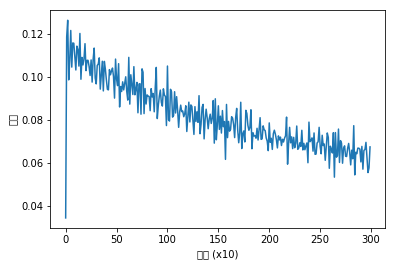

In [12]:
from common.trainer import Trainer

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()